In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

[*********************100%%**********************]  1 of 1 completed


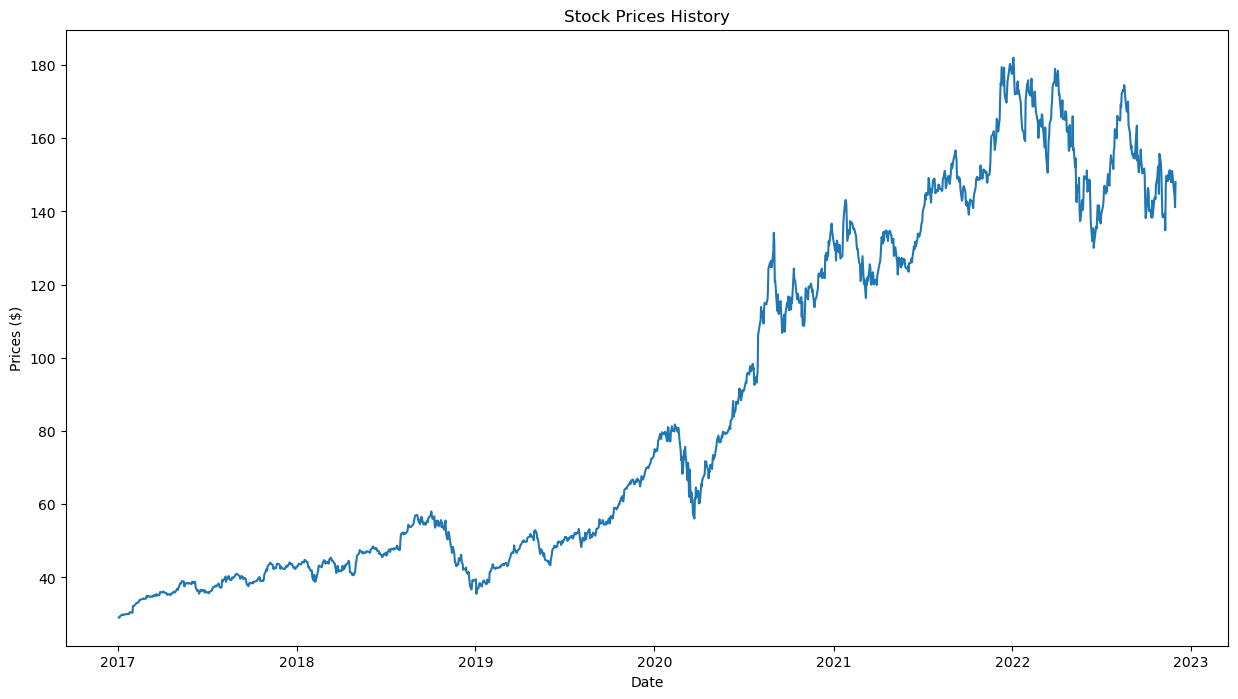

/home/balram/Downloads/#/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/balram/Downloads/#/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/balram/Downloads/#/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/balram/Downloads/#/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

forecast_steps 298
     Predictions      Actual
0     146.731988  145.369995
1     146.879583  141.910004
2     147.091373  142.830002
3     147.207439  141.500000
4     147.188277  142.649994
..           ...         ...
293   175.858963  151.070007
294   175.960650  148.110001
295   176.063795  144.220001
296   176.156013  141.169998
297   176.257425  148.029999

[298 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-01 -> 2022-12-01)')



predictionsshape (298,)


/tmp/ipykernel_12083/1323238816.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = forecast.values


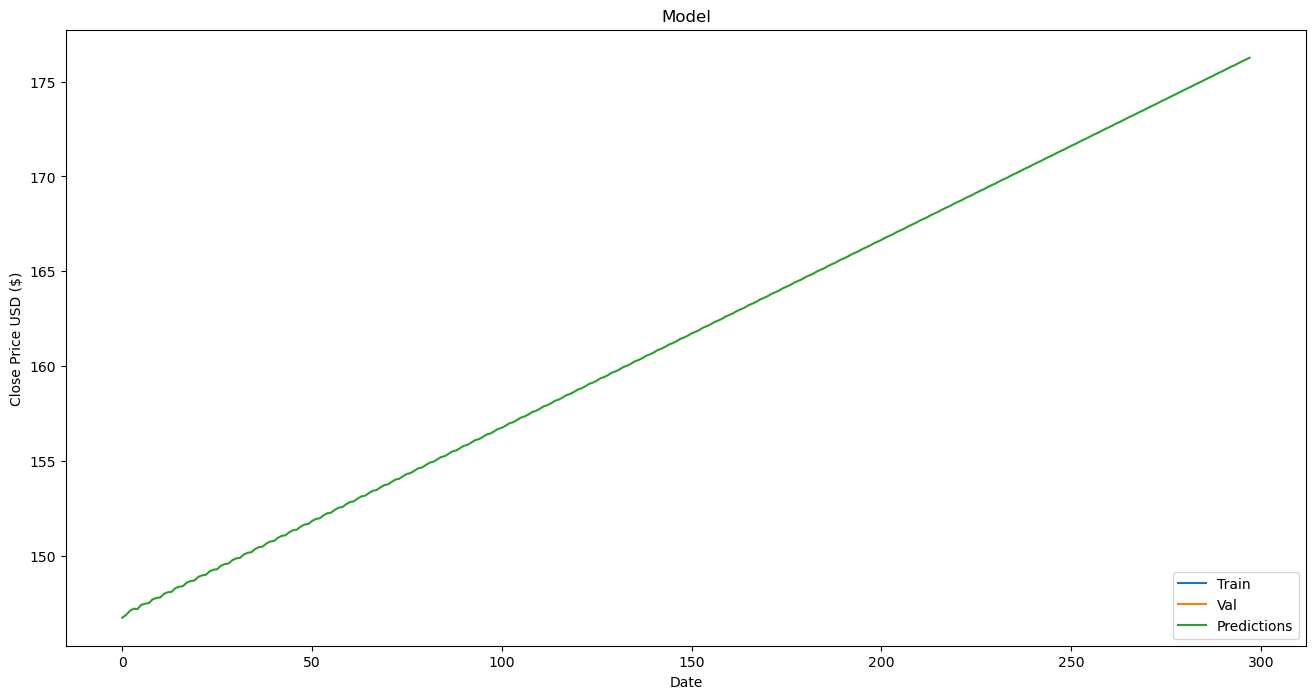

Root Mean Squared Error (RMSE): 17.859687107735873


In [5]:
class StockAnalyzer:
    def __init__(self, stock_symbol, start_date, end_date, order=(1, 1, 1)):
        self.stock_symbol = stock_symbol
        self.start_date = start_date
        self.end_date = end_date
        self.order = order

    def download_stock_data(self):
        stock_data = yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)
        return stock_data

    def plot_stock_prices(self, stock_data):
        plt.figure(figsize=(15, 8))
        plt.title('Stock Prices History')
        plt.plot(stock_data['Close'])
        plt.xlabel('Date')
        plt.ylabel('Prices ($)')
        plt.show()

    def prepare_data(self, stock_data):
        stock_data = stock_data["Close"]
        train_size = int(len(stock_data) * 0.8)
        train_data = stock_data.iloc[:train_size]
        test_data = stock_data.iloc[train_size:]
        return train_data, test_data

    def build_model(self, train_data):
        # Fit an ARIMA model
        model = ARIMA(train_data, order=self.order)
        results = model.fit()
        return results

    def train_model(self):
        stock_data = self.download_stock_data()
        self.plot_stock_prices(stock_data)
        train_data, test_data = self.prepare_data(stock_data)
        model_results = self.build_model(train_data)
        forecast_steps = len(test_data)
        print("forecast_steps",forecast_steps)
        forecast = model_results.forecast(steps=forecast_steps)
        return test_data, forecast

    def evaluate_model(self, test_data, forecast):
        predictions_list = forecast.tolist()
        Actual = test_data.tolist()
        df = pd.DataFrame({'Predictions': predictions_list, 'Actual': Actual})
        print(df)
        rmse = np.sqrt(mean_squared_error(test_data.values, forecast.values))
        return rmse

    def plot_predictions(self, stock_data, test_data, forecast):
        print("predictionsshape",forecast.shape)
        data = stock_data.filter(['Close'])
        training_data_len = len(stock_data) - len(test_data)
        train = data[:training_data_len]
        validation = data[training_data_len:]
        validation['Predictions'] = forecast.values

        plt.figure(figsize=(16, 8))
        plt.title('Model')
        plt.xlabel('Date')
        plt.ylabel('Close Price USD ($)')
        plt.plot(train)
        plt.plot(validation[['Close', 'Predictions']])
        plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
        plt.show()

    def analyze_stock(self):
        test_data, forecast = self.train_model()
        rmse = self.evaluate_model(test_data, forecast)
        self.plot_predictions(self.download_stock_data(), test_data, forecast)  # Call plot_predictions
        print(f"Root Mean Squared Error (RMSE): {rmse}")

if __name__ == "__main__":
    stock_symbol = 'AAPL'
    start_date = '2017-01-01'
    end_date = '2022-12-01'
    order = (7, 2, 4)
    
    # Create an instance of the StockAnalyzer class
    stock_analyzer = StockAnalyzer(stock_symbol, start_date, end_date, order)
    
    # Call the analyze_stock method to perform the analysis
    stock_analyzer.analyze_stock()
